# 機械学習

機械学習は与えられたデータをよく表現できるようにモデルのパラメーターを調整し「学習」を行います。学習したモデルを用いることで、新たなデータに対する予測を行うことができます。

## 機械学習の種類
機械学習は次の３つに大別できます。このNotebookではこのうち教師あり学習と教師なし学習を扱います。
1. 教師あり学習 (Supervised learning)
    - データの特徴（特徴量）に対して正解データ（正しい答え、ラベル、Ground Truth）がある場合は教師あり学習と呼ばれます。正解データを教師としてデータからラベルを予測できるように学習します。
        - 分類 ラベルが離散値　（例：犬か猫かを予測する）
        - 回帰 ラベルが連続値　（例：明日の株価を予測する）
        
        
2. 教師なし学習 (Unsupervised learning)
     - ラベルがないデータのみからデータの構造や特徴・パターンなどをよく表すようなモデルをつくります。
         - クラスタリング
         - PCAなどの次元圧縮
         
3. 強化学習 (Reinforcement learning)
    - ラベルはないですが報酬が与えられます。報酬を最大化するように学習する。


## 機械学習のデータ

- 学習データ(訓練データ、training data)
- 検証データ(テストデータ、testing data/validation data)

機械学習とは、データセットの特徴を学習し、別のデータセットに対してそれらの特徴をテストします。機械学習の一般的な方法は、データセットを2つに分割してアルゴリズムを評価することです。これらのセットのうちの1つを学習データ(training data)と呼び、そこから特徴を学習し、もう1つのセットを検証データ(testing data)と呼び、その上で学習した特徴をテストします。


ここではPythonの`scikit-learn`を用いて機械学習を動かしてみます。

## 教師あり学習

### 分類問題

まず、サンプルデータセットをダウンロードします。
３種類の花（iris）のがくへんの長さや・幅、花弁の長さや・幅が特徴量として与えられているデータです。
これらの特徴から、３種類のうちどの種類の花なのかを学習・予測します。

データで
- 0: `setosa`
- 1: `versicolor`
- 2: `virginica`

を示します。

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn import svm
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names).reset_index(drop=True)
target = pd.DataFrame(data.target, columns = ['species']).reset_index(drop=True)
df = df.merge(target, left_index=True, right_index=True, )
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
X = df.iloc[:, :4]
y = df['species']

In [5]:
X.shape, y.shape

((150, 4), (150,))

In [6]:
# 学習データと検証データに分割

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [7]:
# ロジスティック回帰モデル (one-vs-rest)
model=LogisticRegression()
model.fit(X_train, y_train) # モデルを訓練データに適合
y_predicted=model.predict(X_test) # テストデータでラベルを予測
accuracy_score(y_test, y_predicted) # 予測精度（accuracy）の評価

0.9777777777777777

In [8]:

print(confusion_matrix(y_test, y_predicted))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [9]:

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [11]:
# Support Vector Machine (SVM)
clf = svm.SVC()
clf.fit(X_train, y_train) # モデルを訓練データに適合
y_predicted_clf = clf.predict(X_test)
print(accuracy_score(y_test, y_predicted_clf))
print(confusion_matrix(y_test, y_predicted_clf))
print(classification_report(y_test, y_predicted_clf))

0.9619047619047619
0.9777777777777777


### 1.2 回帰問題

irisデータセットを用いて、特徴量の一つ`petal length`から`petal width`を予測する回帰モデルをつくります

In [12]:
X = df[['petal length (cm)']]
y = df[['petal width (cm)']]

散布図を描いて相関を確認します

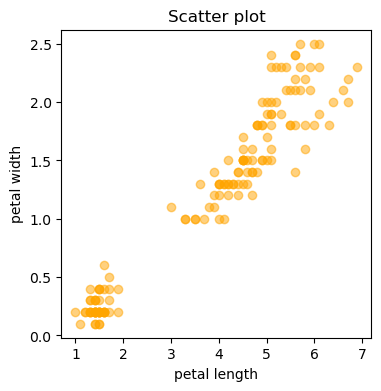

In [13]:
plt.figure(figsize = (4,4))
plt.scatter(X,y, color = 'orange', alpha = .5)
plt.title('Scatter plot')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [14]:
# 学習データと検証データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,)

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test)) # R2
y_predicted = lr.predict(X_test)
print(mean_squared_error(y_test, y_predicted))

0.9217091797032136
0.039618634662187104


次に、学習された回帰モデルをプロットすることで、`petal_length`と`petal_width`の実際のデータをうまく表現できているかを確認します。

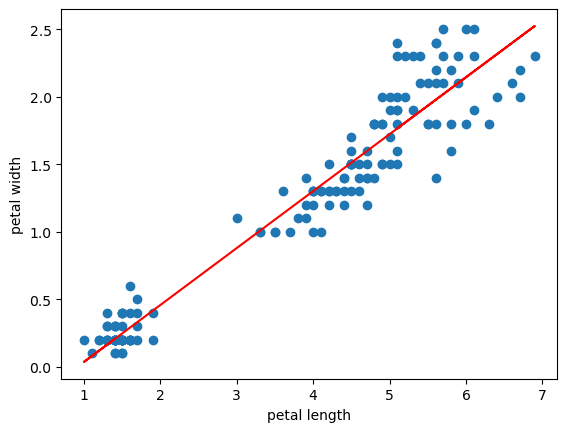

In [16]:
plt.scatter(X,y)
plt.plot(X, lr.predict(X), color = 'red') # 回帰直線をプロット
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

モデルがデータをうまく表現できているかを確認する方法としては、残差のプロットも有効です。

残差が0の周辺でランダムにばらついていれば、うまく表現できていて、そうでない別のパターン等がある場合は、モデルでは説明しきれていない情報があることが示唆されます。

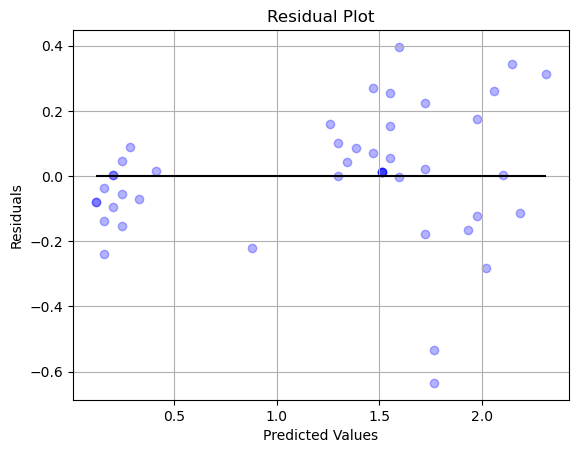

In [17]:
plt.scatter(y_predicted, y_predicted - y_test, color = 'blue', alpha = 0.3)      # 残差をプロット 
plt.hlines(y = 0, xmin = min(y_predicted), xmax = max(y_predicted), color = 'black') # x軸に沿った直線をプロット
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()